# Deep Learining Project 2
###    Wojciech Wieczorek 145465
###    Jerzy Łukaszewicz 145458

For each class, there is one pattern occurring in the data. Solving just a classification task be scored no higher than 70%. 

Please provide either pdf with the report or add some notes in the notebook. Demonstrate some examples of how your approach works.

A short reminder of your task:
 - Correct classification of provided time series
 - Explanation of the prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, RepeatVector, TimeDistributed, Flatten, Softmax
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import Sequence, plot_model
import tensorflow.keras.backend as K
import tensorflow as tf

In [3]:
np.random.seed(42)

In [4]:
n = 50000

In [5]:
def createRow(n, classes):
    base = np.sin(np.linspace((np.random.rand(3)),(np.random.rand(3) + np.array([10,15,7])),n))
    if classes[0] > 0:
        base[np.random.randint(0,n), 0] += 2
    if classes[1] > 0:
        base[np.random.randint(0,n), 1] -= 2
    if classes[2] > 0:
        x = np.random.randint(0,n-5)
        base[x:x+4,2] = 0
    if classes[3] > 0:
        x = np.random.randint(0,n-10)
        base[x:x+8,1] += 1.5
    if classes[4] > 0:
        x = np.random.randint(0,n-7)
        base[x:x+6,0] += 1.5
        base[x:x+6,2] -= 1.5
    base += np.random.rand(*base.shape)*.2
    return base

In [6]:
xl, yl = [], []
for _ in range(n):
    cl = np.random.rand(5)<.25
    xl.append(createRow(np.random.randint(40,60), cl))
    yl.append(cl)  

[False False False False  True]


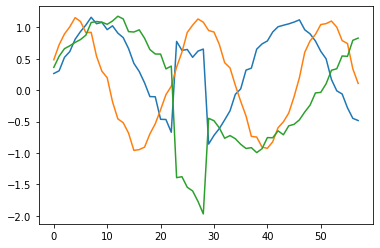

[False False False  True  True]


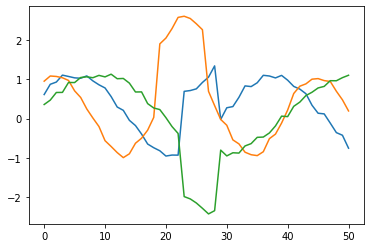

[False False False False False]


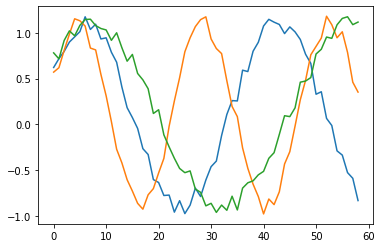

In [7]:
for i in range(3):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

In [8]:
padded_xl = tf.keras.preprocessing.sequence.pad_sequences(
    xl, padding="post",dtype='float32'
)

In [9]:
padded_xl.shape

(50000, 59, 3)

In [10]:
padded_xl = np.array(padded_xl)
new_yl = np.array(yl).astype(int)

#### Split sizes: 
* 80% - train
* 10% - validation
* 10% - test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded_xl, new_yl, test_size=0.2, random_state=42)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [13]:
model = Sequential()
model.add(Input(shape=(None, 3)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(5,activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          17408     
                                                                 
 lstm_1 (LSTM)               (None, None, 32)          12416     
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 46,629
Trainable params: 46,629
Non-trainable params: 0
_________________________________________________________________


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(X_train,y_train, epochs=25, validation_data = (X_val, y_val), batch_size=64,verbose=1, callbacks=[callback])

Epoch 1/25
625/625 [==============================] - 35s 49ms/step - loss: 0.3686 - recall: 0.3784 - precision: 0.9440 - val_loss: 0.2753 - val_recall: 0.5486 - val_precision: 0.9670
Epoch 2/25
625/625 [==============================] - 30s 48ms/step - loss: 0.2525 - recall: 0.6110 - precision: 0.9495 - val_loss: 0.2136 - val_recall: 0.6589 - val_precision: 0.9842
Epoch 3/25
625/625 [==============================] - 30s 48ms/step - loss: 0.2092 - recall: 0.6666 - precision: 0.9737 - val_loss: 0.2054 - val_recall: 0.6656 - val_precision: 0.9858
Epoch 4/25
625/625 [==============================] - 29s 47ms/step - loss: 0.1909 - recall: 0.6961 - precision: 0.9738 - val_loss: 0.1715 - val_recall: 0.7207 - val_precision: 0.9884
Epoch 5/25
625/625 [==============================] - 29s 47ms/step - loss: 0.1740 - recall: 0.7319 - precision: 0.9665 - val_loss: 0.1504 - val_recall: 0.7632 - val_precision: 0.9843
Epoch 6/25
625/625 [==============================] - 29s 46ms/step - loss: 0.15

In [24]:
model.evaluate(X_test,y_test)

157/157 [==============================] - 2s 13ms/step - loss: 0.0146 - recall: 0.9872 - precision: 0.9967


[0.014599783346056938, 0.9871694445610046, 0.9966824650764465]

In [17]:
model.save("model_numero_uno")

INFO:tensorflow:Assets written to: model_numero_uno\assets


INFO:tensorflow:Assets written to: model_numero_uno\assets


In [43]:
model.predict(np.array([X_test[12]])).round()

array([[0., 0., 1., 0., 0.]], dtype=float32)

[0 0 1 0 0]


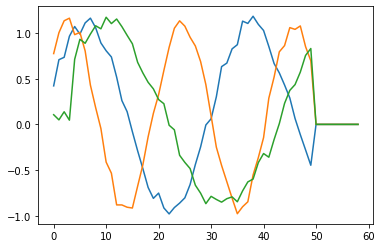

In [42]:
plt.plot(X_test[12])
print(y_test[12])